In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import Ridge, RidgeCV

# Preprocessing Train and Test set

In [2]:
df = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')
                 
print(df.shape)

(1460, 81)


In [3]:
# Copy test set id for submission
Id = dfTest['Id']

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
dfTest.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [9]:
# Correct the GarageYrBlt number as it should be an entry error

dfTest.loc[dfTest.GarageYrBlt == 2207, "GarageYrBlt"] = 2007


In [10]:
# Print columns with missing values

na = df.columns[df.isnull().sum() > 0]
naTest = dfTest.columns[dfTest.isnull().sum() > 0]

dfna = pd.DataFrame(df, columns=na)
dfTestna = pd.DataFrame(dfTest, columns=naTest)

print("Train set NA columns: ", dfna.columns.values, " --- With Total of: ", len(dfna.columns), "columns.")
print("Test set NA columns: ", dfTestna.columns.values, " --- With Total of: ", len(dfTestna.columns), "columns.")

Train set NA columns:  ['LotFrontage' 'Alley' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Electrical' 'FireplaceQu'
 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual' 'GarageCond'
 'PoolQC' 'Fence' 'MiscFeature']  --- With Total of:  19 columns.
Test set NA columns:  ['MSZoning' 'LotFrontage' 'Alley' 'Utilities' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'BsmtFullBath' 'BsmtHalfBath' 'KitchenQual' 'Functional'
 'FireplaceQu' 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageCars'
 'GarageArea' 'GarageQual' 'GarageCond' 'PoolQC' 'Fence' 'MiscFeature'
 'SaleType']  --- With Total of:  33 columns.


In [11]:
# Print categorical columns with missing values

dfnaCat = dfna.select_dtypes('object')
dfTestnaCat = dfTestna.select_dtypes('object')

print("Train set NA categorical columns: ", dfnaCat.columns.values, " --- With Total of: ", len(dfnaCat.columns), "columns.")
print("Test set NA categorical columns: ", dfTestnaCat.columns.values, " --- With Total of: ", len(dfTestnaCat.columns), "columns.")

Train set NA categorical columns:  ['Alley' 'MasVnrType' 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1'
 'BsmtFinType2' 'Electrical' 'FireplaceQu' 'GarageType' 'GarageFinish'
 'GarageQual' 'GarageCond' 'PoolQC' 'Fence' 'MiscFeature']  --- With Total of:  16 columns.
Test set NA categorical columns:  ['MSZoning' 'Alley' 'Utilities' 'Exterior1st' 'Exterior2nd' 'MasVnrType'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'KitchenQual' 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish'
 'GarageQual' 'GarageCond' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType']  --- With Total of:  22 columns.


In [12]:
# Fill 'NA' to categorical columns

values = {'Alley': 'NA', 'MasVnrType': 'NA', 'BsmtQual': 'NA', 'BsmtCond': 'NA', 'BsmtExposure': 'NA',
       'BsmtFinType1': 'NA', 'BsmtFinType2': 'NA', 'Electrical': 'NA', 'FireplaceQu': 'NA',
       'GarageType': 'NA', 'GarageFinish': 'NA', 'GarageQual': 'NA', 'GarageCond': 'NA', 'PoolQC': 'NA',
       'Fence': 'NA', 'MiscFeature': 'NA'}

valuesTest = {'Alley': 'NA', 'MasVnrType': 'NA', 'BsmtQual': 'NA', 'BsmtCond': 'NA', 'BsmtExposure': 'NA',
       'BsmtFinType1': 'NA', 'BsmtFinType2': 'NA', 'Electrical': 'NA', 'FireplaceQu': 'NA',
       'GarageType': 'NA', 'GarageFinish': 'NA', 'GarageQual': 'NA', 'GarageCond': 'NA', 'PoolQC': 'NA',
       'Fence': 'NA', 'MiscFeature': 'NA', 'MSZoning': 'NA', 'Utilities': 'NA', 'Exterior1st': 'NA',
        'Exterior2nd': 'NA', 'KitchenQual': 'NA', 'Functional': 'NA', 'SaleType':'NA'}

df = df.fillna(value = values)
dfTest = dfTest.fillna(value = valuesTest)

In [13]:
print("Train set numeric columns NA: ", df.columns[df.isnull().sum() > 0])
print("Test set numeric columns NA: ", dfTest.columns[dfTest.isnull().sum() > 0])

Train set numeric columns NA:  Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
Test set numeric columns NA:  Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')


C:\Users\Terry Chong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Terry Chong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


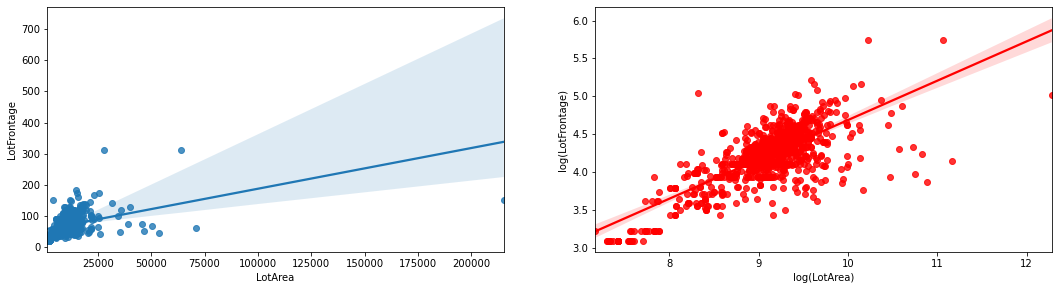

In [14]:
# Examine relationship between LotArea and LotFrontage

plt.figure(figsize = (18, 4.5))

plt.subplot(121)
sns.regplot(df.LotArea, df.LotFrontage, dropna = True, fit_reg= True)

plt.subplot(122)
sns.regplot(np.log1p(df.LotArea), np.log1p(df.LotFrontage), dropna = True, color = 'r', fit_reg = True)
plt.xlabel("log(LotArea)")
plt.ylabel("log(LotFrontage)")
plt.show()

In [15]:
class RegressionImputer:
    def __init__(self, model):
        self.model = model
    
    def fit(self, _X, _y):
        X = _X.copy()
        y = _y.copy()
       
        X, y = X[~(X.isna()|y.isna())], y[~(X.isna()|y.isna())]
        X = X.loc[y.index]
        y = np.log1p(y.values)
        X = np.log1p(X.values.reshape(-1, 1))
        self.model.fit(X, y)
        
        return self
    
    def transform(self, _X, _y):
        if _y.isna().sum() == 0:
            return _y
        
        X = _X.copy()
        y = _y.copy()
        
        idx = y[y.isna()].index
        X = X.loc[idx]
        X = np.log1p(X.values.reshape(-1, 1))
        y_pred = self.model.predict(X)
        y[y.isna()] = np.expm1(y_pred)
        
        return y

In [16]:
# Fill in missing values using the log model 

imputer = RegressionImputer(RidgeCV())
imputer.fit(df.LotArea, df.LotFrontage)

df.LotFrontage = imputer.transform(df.LotArea, df.LotFrontage)
dfTest.LotFrontage = imputer.transform(dfTest.LotArea, dfTest.LotFrontage)

In [17]:
# Fill 0 to MasVnrArea as they are not available
# Fill 0 to GarageYrBlt as they are not available
# Fill 0 to Basement Info as they are not available

df['MasVnrArea'].fillna(0, inplace= True)
df['GarageYrBlt'].fillna(0, inplace = True)

dfTest['MasVnrArea'].fillna(0, inplace= True)
dfTest['GarageYrBlt'].fillna(0, inplace = True)
##
dfTest['BsmtFinSF1'].fillna(0, inplace= True)
dfTest['BsmtFinSF2'].fillna(0, inplace= True)
dfTest['BsmtUnfSF'].fillna(0, inplace= True)
dfTest['TotalBsmtSF'].fillna(0, inplace= True)
dfTest['BsmtFullBath'].fillna(0, inplace= True)
dfTest['BsmtHalfBath'].fillna(0, inplace= True)

In [18]:
# Fill mean of Garage Area to detached Garage missing values
# Full mode of Garage cars to detached Garage missing values

mean = df.GarageArea[df.GarageType == 'Detchd'].mean()
dfTest.GarageArea.fillna(value = mean, inplace = True)

mode = df.GarageCars[df.GarageType == 'Detchd'].mode().values[0]
dfTest.GarageCars.fillna(value = mode, inplace = True)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Visualization

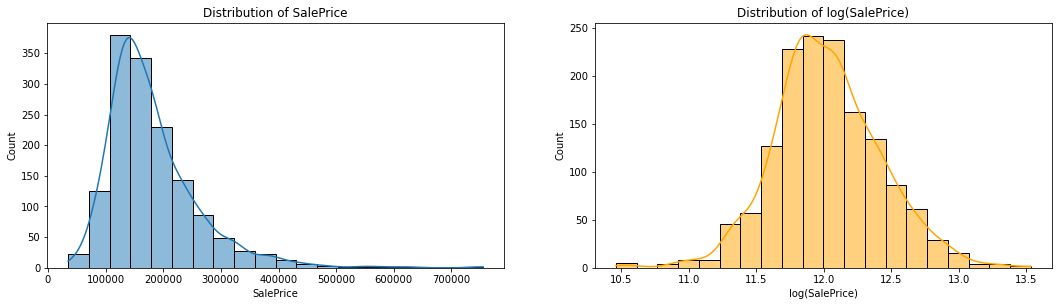

In [21]:
# SalePrice

plt.figure(figsize = (18, 4.5))

plt.subplot(121)
sns.histplot(df.SalePrice, bins = 20, kde = True)
plt.title("Distribution of SalePrice")

plt.subplot(122)
sns.histplot(np.log1p(df.SalePrice), bins = 20, kde = True, color = 'orange')
plt.xlabel("log(SalePrice)")
plt.title("Distribution of log(SalePrice)")

plt.show()

In [22]:
df["logSalePrice"] = np.log1p(df.SalePrice)
df = df.drop(columns =["SalePrice"])

<AxesSubplot:>

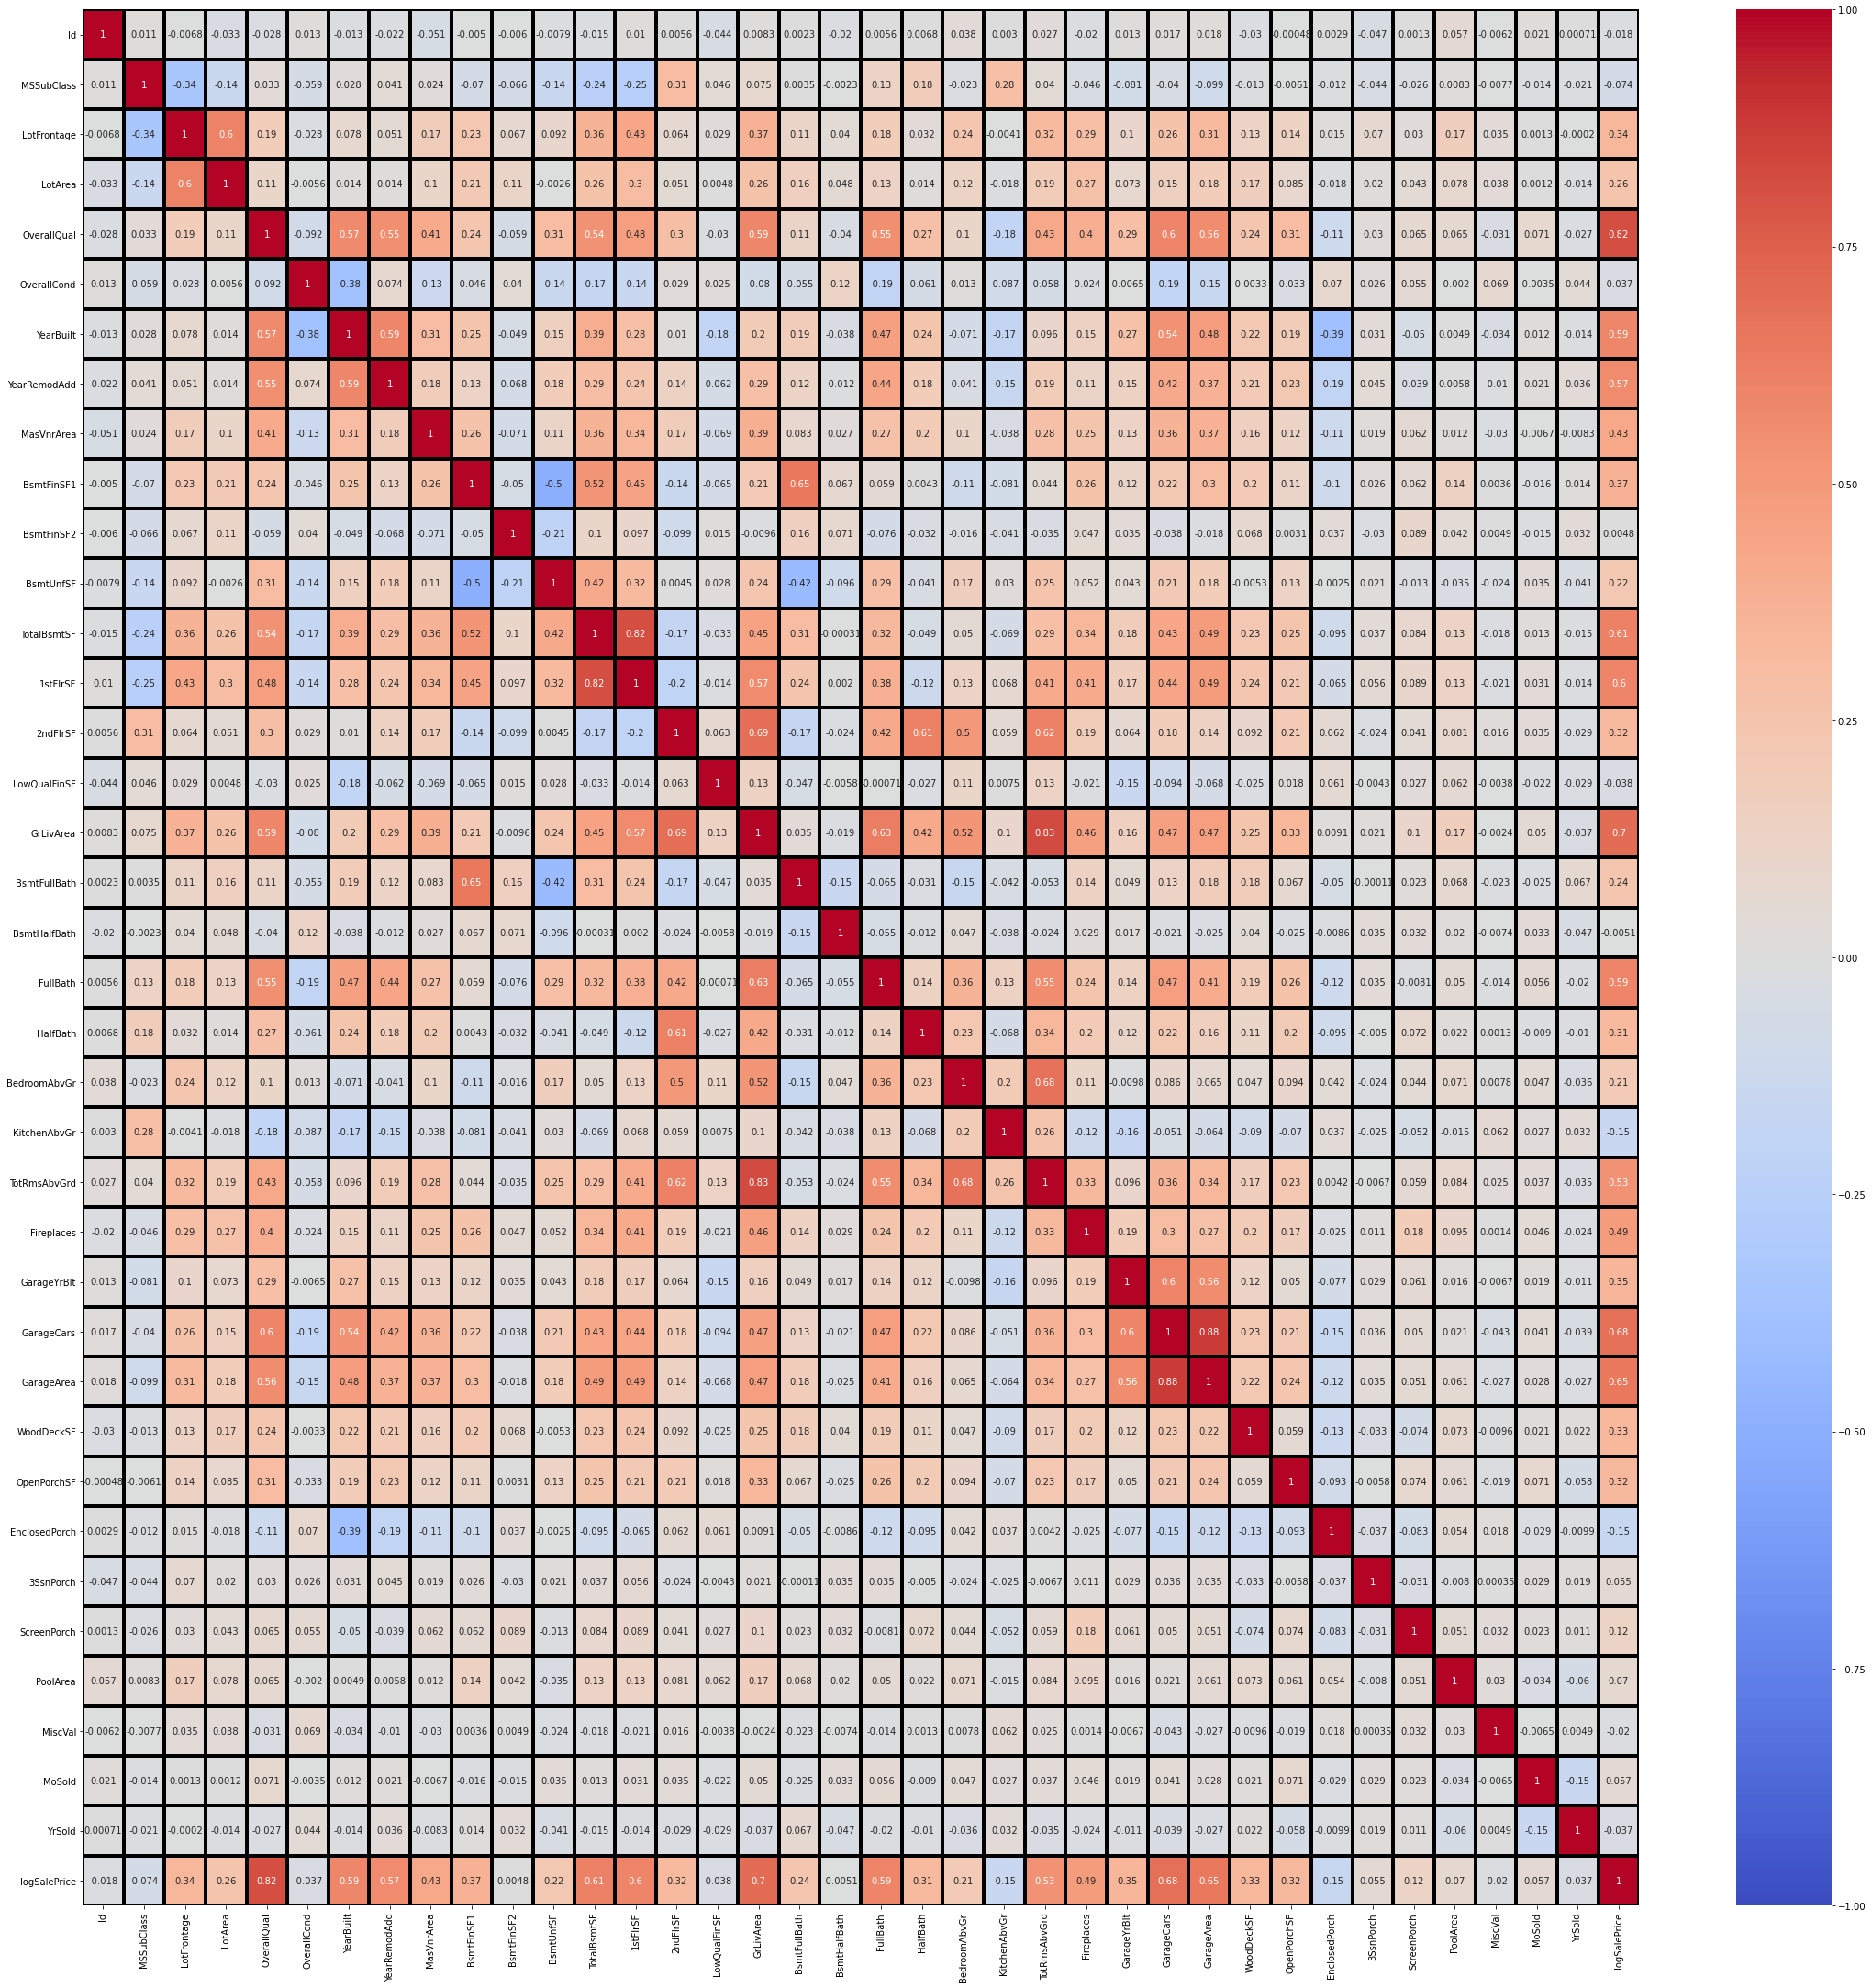

In [23]:
# Correlation plot

fig, ax = plt.subplots(figsize = (38,38))
corr = df.corr()
sns.heatmap(corr, annot = True, ax=ax, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=3, linecolor='black')

In [24]:
# Low correlation with Saleprice
# ['Id', 'MSSubClass', 'BsmtFinSF2', 'LowQualFinSF', 'BsmHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
print(corr['logSalePrice'])

col_drops = ['Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 
             'MiscVal', 'MoSold', 'YrSold']

df = df.drop(col_drops, axis=1)
dfTest = dfTest.drop(col_drops, axis= 1)

Id              -0.017942
MSSubClass      -0.073959
LotFrontage      0.340257
LotArea          0.257320
OverallQual      0.817185
OverallCond     -0.036868
YearBuilt        0.586570
YearRemodAdd     0.565608
MasVnrArea       0.426776
BsmtFinSF1       0.372023
BsmtFinSF2       0.004832
BsmtUnfSF        0.221985
TotalBsmtSF      0.612134
1stFlrSF         0.596981
2ndFlrSF         0.319300
LowQualFinSF    -0.037963
GrLivArea        0.700927
BsmtFullBath     0.236224
BsmtHalfBath    -0.005149
FullBath         0.594771
HalfBath         0.313982
BedroomAbvGr     0.209043
KitchenAbvGr    -0.147548
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
GarageYrBlt      0.349013
GarageCars       0.680625
GarageArea       0.650888
WoodDeckSF       0.334135
OpenPorchSF      0.321053
EnclosedPorch   -0.149050
3SsnPorch        0.054900
ScreenPorch      0.121208
PoolArea         0.069798
MiscVal         -0.020021
MoSold           0.057330
YrSold          -0.037263
logSalePrice     1.000000
Name: logSal

# Data Transformation

In [25]:
# Print categorical columns

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = set(df.columns.difference(set(numeric_cols)))
print(categorical_cols)

{'Alley', 'GarageCond', 'LotConfig', 'BsmtQual', 'Functional', 'Neighborhood', 'FireplaceQu', 'SaleCondition', 'SaleType', 'Street', 'Condition2', 'GarageFinish', 'BsmtFinType2', 'BsmtFinType1', 'LotShape', 'GarageType', 'RoofMatl', 'CentralAir', 'BldgType', 'BsmtCond', 'Heating', 'LandContour', 'KitchenQual', 'Fence', 'LandSlope', 'MSZoning', 'MiscFeature', 'Condition1', 'PoolQC', 'Electrical', 'ExterCond', 'HouseStyle', 'BsmtExposure', 'Exterior2nd', 'ExterQual', 'MasVnrType', 'RoofStyle', 'PavedDrive', 'HeatingQC', 'Foundation', 'Utilities', 'Exterior1st', 'GarageQual'}


In [26]:
# Change data types to category

categorical_cols = list(categorical_cols)
print(categorical_cols)
df[categorical_cols] = df[categorical_cols].astype('category')
dfTest[categorical_cols] = dfTest[categorical_cols].astype('category')

['Alley', 'GarageCond', 'LotConfig', 'BsmtQual', 'Functional', 'Neighborhood', 'FireplaceQu', 'SaleCondition', 'SaleType', 'Street', 'Condition2', 'GarageFinish', 'BsmtFinType2', 'BsmtFinType1', 'LotShape', 'GarageType', 'RoofMatl', 'CentralAir', 'BldgType', 'BsmtCond', 'Heating', 'LandContour', 'KitchenQual', 'Fence', 'LandSlope', 'MSZoning', 'MiscFeature', 'Condition1', 'PoolQC', 'Electrical', 'ExterCond', 'HouseStyle', 'BsmtExposure', 'Exterior2nd', 'ExterQual', 'MasVnrType', 'RoofStyle', 'PavedDrive', 'HeatingQC', 'Foundation', 'Utilities', 'Exterior1st', 'GarageQual']


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [28]:
for i, x in enumerate(categorical_cols):
    print(i+1, ":", x, df[x].unique())

1 : Alley ['NA', 'Grvl', 'Pave']
Categories (3, object): ['NA', 'Grvl', 'Pave']
2 : GarageCond ['TA', 'Fa', 'NA', 'Gd', 'Po', 'Ex']
Categories (6, object): ['TA', 'Fa', 'NA', 'Gd', 'Po', 'Ex']
3 : LotConfig ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
Categories (5, object): ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
4 : BsmtQual ['Gd', 'TA', 'Ex', 'NA', 'Fa']
Categories (5, object): ['Gd', 'TA', 'Ex', 'NA', 'Fa']
5 : Functional ['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev']
Categories (7, object): ['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev']
6 : Neighborhood ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', ..., 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
Length: 25
Categories (25, object): ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', ..., 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
7 : FireplaceQu ['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po']
Categories (6, object): ['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po']
8 : SaleCondition ['Normal', 'Abnorml', 'Partial', 'AdjLand'

In [29]:
# Concatenate train and test data

data = pd.concat([df, dfTest], ignore_index = True)

In [30]:
le = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(le.fit_transform)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   int32  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int32  
 5   Alley          2919 non-null   int32  
 6   LotShape       2919 non-null   int32  
 7   LandContour    2919 non-null   int32  
 8   Utilities      2919 non-null   int32  
 9   LotConfig      2919 non-null   int32  
 10  LandSlope      2919 non-null   int32  
 11  Neighborhood   2919 non-null   int32  
 12  Condition1     2919 non-null   int32  
 13  Condition2     2919 non-null   int32  
 14  BldgType       2919 non-null   int32  
 15  HouseStyle     2919 non-null   int32  
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [31]:
data[categorical_cols] = data[categorical_cols].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     2919 non-null   int64   
 1   MSZoning       2919 non-null   category
 2   LotFrontage    2919 non-null   float64 
 3   LotArea        2919 non-null   int64   
 4   Street         2919 non-null   category
 5   Alley          2919 non-null   category
 6   LotShape       2919 non-null   category
 7   LandContour    2919 non-null   category
 8   Utilities      2919 non-null   category
 9   LotConfig      2919 non-null   category
 10  LandSlope      2919 non-null   category
 11  Neighborhood   2919 non-null   category
 12  Condition1     2919 non-null   category
 13  Condition2     2919 non-null   category
 14  BldgType       2919 non-null   category
 15  HouseStyle     2919 non-null   category
 16  OverallQual    2919 non-null   int64   
 17  OverallCond    2919 non-null   in

In [32]:
data = pd.get_dummies(data, columns=categorical_cols)

In [33]:
df = data.iloc[:1460, :]
dfTest = data.iloc[1460:, :]

In [34]:
df.shape

(1460, 305)

In [35]:
dfTest = dfTest.drop(columns=['logSalePrice'])
dfTest.shape

(1459, 304)

# Normalization

In [36]:
numeric_cols_y = ['logSalePrice']
numeric_cols_x = [x for x in numeric_cols if x not in numeric_cols_y]

In [37]:
sc_x = StandardScaler()
sc_y = StandardScaler()

df.loc[:,numeric_cols_x] = sc_x.fit_transform(df[numeric_cols_x])
dfTest.loc[:,numeric_cols_x] = sc_x.fit_transform(dfTest[numeric_cols_x])

C:\Users\Terry Chong\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [38]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,Exterior1st_12,Exterior1st_13,Exterior1st_14,Exterior1st_15,GarageQual_0,GarageQual_1,GarageQual_2,GarageQual_3,GarageQual_4,GarageQual_5
0,0.073375,-0.240723,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.944591,...,0,1,0,0,0,0,0,0,0,1
1,-0.872563,0.343841,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.641228,...,0,0,0,0,0,0,0,0,0,1
2,0.073375,-0.123810,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.301643,...,0,1,0,0,0,0,0,0,0,1
3,0.309859,-0.435578,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.061670,...,0,0,1,0,0,0,0,0,0,1
4,0.073375,0.499725,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.174865,...,0,1,0,0,0,0,0,0,0,1


In [39]:
y = df['logSalePrice']
x = df.loc[:, df.columns != 'logSalePrice']

In [40]:
X_train, X_dev, Y_train, Y_dev = train_test_split(x, y, test_size = 0.1, random_state=10)

In [41]:
init_models= {'Support vector linear': SVR(kernel = 'linear'),
              'Support vector kernel': SVR(kernel = 'rbf'),
              'XGBOOST': XGBRegressor(),
              'LGBM': LGBMRegressor(),
              'GBR': GradientBoostingRegressor(),
              'Random Forest': RandomForestRegressor(),
              }
    
R2 = []

models_names = []

for i, (key, model) in enumerate(init_models.items()):
    model.fit(X_train, Y_train)
    models_names.append(key)
    R2.append(np.mean(cross_val_score(model, X_train, Y_train, cv = 5)))
    
models_scores = pd.DataFrame({'model name': models_names, 'R2 score': R2})
models_scores

,model name,R2 score
0,Support vector linear,0.842363
1,Support vector kernel,0.876469
2,XGBOOST,0.861332
3,LGBM,0.884208
4,GBR,0.891124
5,Random Forest,0.860552


# Model 1: Random Forest

In [42]:
rf = RandomForestRegressor()

param_grid = {'n_estimators': [10, 20, 50],
              'max_features': ['auto', 'sqrt'],
             'max_depth': [2, 5, 8, 10],
             'min_samples_split': [2, 5, 10, 15, 100],
             'min_samples_leaf': [1, 2, 5, 10],
             'random_state': [10],
             }

rf_cv = GridSearchCV(rf, param_grid, refit = 'recall', scoring = 'neg_root_mean_squared_error',
                          cv = 5, verbose = 2)

rf_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, random_state=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, random_state=10; total time

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 8, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [10, 20, 50], 'random_state': [10]},
             refit='recall', scoring='neg_root_mean_squared_error', verbose=2)

In [43]:
rfRegressor = RandomForestRegressor(**rf_cv.best_params_)

rfRegressor.fit(X_train, Y_train)
Y_pred_train = rfRegressor.predict(X_train)
Y_pred = rfRegressor.predict(X_dev)
rmse_rf_train = mean_squared_error(Y_pred_train, Y_train, squared = False)
rmse_rf = mean_squared_error(Y_pred, Y_dev, squared = False)

print('='*30)
print("[TRAIN] The model has root mean square error (RMSE) of: {0:.3f}".format(mean_squared_error(Y_pred_train, Y_train, squared= False)))
print("[TRAIN] The model has mean absolute error (MAE) of: {0:.3f}".format(mean_absolute_error(Y_pred_train, Y_train)))
print("[TRAIN] The model has mean absolute percentage error (MAPE) of: {0:.3f}%".format(mean_absolute_percentage_error(Y_pred_train, Y_train)))
print('='*30)
print("[DEV] The model has root mean square error (RMSE) of: {0:.3f}".format(mean_squared_error(Y_pred, Y_dev, squared= False)))
print("[DEV] The model has mean absolute error (MAE) of: {0:.3f}".format(mean_absolute_error(Y_pred, Y_dev)))
print("[DEV] The model has mean absolute percentage error (MAPE) of: {0:.3f}%".format(mean_absolute_percentage_error(Y_pred, Y_dev)))

[TRAIN] The model has root mean square error (RMSE) of: 0.064
[TRAIN] The model has mean absolute error (MAE) of: 0.046
[TRAIN] The model has mean absolute percentage error (MAPE) of: 0.004%
[DEV] The model has root mean square error (RMSE) of: 0.126
[DEV] The model has mean absolute error (MAE) of: 0.095
[DEV] The model has mean absolute percentage error (MAPE) of: 0.008%


# Model 2: LGBM

In [44]:
lgbm = LGBMRegressor()

param_grid = {
    'learning_rate': [1e-4, 1e-3, 1e-2],
    'max_depth': [5, 8, 10],
    'n_estimators': [100, 500, 1000],
    'boosting_type': ['gbdt', 'dart', 'rf']
}

lgbm_cv = GridSearchCV(lgbm, param_grid, refit = 'recall',
                      scoring = 'neg_root_mean_squared_error', cv = 5, verbose = 2)

lgbm_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END boosting_type=gbdt, learning_rate=0.0001, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END boosting_type=gbdt, learning_rate=0.0001, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END boosting_type=gbdt, learning_rate=0.0001, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END boosting_type=gbdt, learning_rate=0.0001, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END boosting_type=gbdt, learning_rate=0.0001, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END boosting_type=gbdt, learning_rate=0.0001, max_depth=5, n_estimators=500; total time=   1.0s
[CV] END boosting_type=gbdt, learning_rate=0.0001, max_depth=5, n_estimators=500; total time=   0.8s
[CV] END boosting_type=gbdt, learning_rate=0.0001, max_depth=5, n_estimators=500; total time=   0.9s
[CV] END boosting_type=gbdt, learning_rate=0.0001, max_depth=5, n_estimators=500; total time=   0.8s
[CV] END boosting_type=gbdt, 

C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=5, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=5, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=5, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=5, n_estimators=500; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=5, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=5, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=5, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=5, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=5, n_estimators=1000; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=5, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=8, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=8, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=8, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=8, n_estimators=100; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=8, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=8, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=8, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=8, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=8, n_estimators=500; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=8, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=8, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=8, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=8, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=8, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=8, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=10, n_estimators=100; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=10, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=10, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=10, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=10, n_estimators=500; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=10, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=10, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=10, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=10, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=10, n_estimators=1000; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.0001, max_depth=10, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.001, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=5, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=5, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=5, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=5, n_estimators=500; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.001, max_depth=5, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=5, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=5, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=5, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=5, n_estimators=1000; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.001, max_depth=5, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=8, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=8, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=8, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=8, n_estimators=100; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.001, max_depth=8, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=8, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=8, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=8, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=8, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=8, n_estimators=500; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.001, max_depth=8, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=8, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=8, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=8, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=8, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=10, n_estimators=100; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.001, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=10, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=10, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=10, n_estimators=500; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.001, max_depth=10, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=10, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=10, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=10, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=10, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=10, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.001, max_depth=10, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=5, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=5, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=5, n_estimators=500; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.01, max_depth=5, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=5, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=5, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=5, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=5, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=5, n_estimators=1000; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.01, max_depth=5, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.01, max_depth=8, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.01, max_depth=8, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=10, n_estimators=100; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.01, max_depth=10, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=10, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=10, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=10, n_estimators=500; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=10, n_estimators=500; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

[CV] END boosting_type=rf, learning_rate=0.01, max_depth=10, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=10, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=10, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=10, n_estimators=1000; total time=   0.0s
[CV] END boosting_type=rf, learning_rate=0.01, max_depth=10, n_estimators=1000; total time=   0.0s


C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "C:\Users\Terry Chong\anaconda3\lib\site-packages\lightgbm\basic.py", line 2610, in __init__
    _safe_call(_LI

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'boosting_type': ['gbdt', 'dart', 'rf'],
                         'learning_rate': [0.0001, 0.001, 0.01],
                         'max_depth': [5, 8, 10],
                         'n_estimators': [100, 500, 1000]},
             refit='recall', scoring='neg_root_mean_squared_error', verbose=2)

In [45]:
LGBMRegressor = LGBMRegressor(**lgbm_cv.best_params_)

LGBMRegressor.fit(X_train, Y_train)
Y_pred_train = LGBMRegressor.predict(X_train)
Y_pred = LGBMRegressor.predict(X_dev)
rmse_lgbm_train = mean_squared_error(Y_pred_train, Y_train, squared= False)
rmse_lgbm = mean_squared_error(Y_pred, Y_dev, squared= False)

print('='*30)
print("[TRAIN] The model has root mean square error (RMSE) of: {0:.3f}".format(mean_squared_error(Y_pred_train, Y_train, squared= False)))
print("[TRAIN] The model has mean absolute error (MAE) of: {0:.3f}".format(mean_absolute_error(Y_pred_train, Y_train)))
print("[TRAIN] The model has mean absolute percentage error (MAPE) of: {0:.3f}%".format(mean_absolute_percentage_error(Y_pred_train, Y_train)))
print('='*30)
print("[DEV] The model has root mean square error (RMSE) of: {0:.3f}".format(mean_squared_error(Y_pred, Y_dev, squared= False)))
print("[DEV] The model has mean absolute error (MAE) of: {0:.3f}".format(mean_absolute_error(Y_pred, Y_dev)))
print("[DEV] The model has mean absolute percentage error (MAPE) of: {0:.3f}%".format(mean_absolute_percentage_error(Y_pred, Y_dev)))

[TRAIN] The model has root mean square error (RMSE) of: 0.072
[TRAIN] The model has mean absolute error (MAE) of: 0.049
[TRAIN] The model has mean absolute percentage error (MAPE) of: 0.004%
[DEV] The model has root mean square error (RMSE) of: 0.111
[DEV] The model has mean absolute error (MAE) of: 0.079
[DEV] The model has mean absolute percentage error (MAPE) of: 0.007%


# Model 3: GBR

In [46]:
gbr = GradientBoostingRegressor()

param_grid = {
    'learning_rate': [1e-4, 1e-3, 1e-2, 1e-1],
    'n_estimators': [10, 20, 30, 50],
    'min_samples_split': [2, 5, 8, 10],
    'max_depth': [5, 10]
}

gbr_cv = GridSearchCV(gbr, param_grid, refit = 'recall',
                      scoring = 'neg_root_mean_squared_error', cv = 5, verbose = 2)

gbr_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END learning_rate=0.0001, max_depth=5, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END learning_rate=0.0001, max_depth=5, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END learning_rate=0.0001, max_depth=5, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END learning_rate=0.0001, max_depth=5, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END learning_rate=0.0001, max_depth=5, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END learning_rate=0.0001, max_depth=5, min_samples_split=2, n_estimators=20; total time=   0.3s
[CV] END learning_rate=0.0001, max_depth=5, min_samples_split=2, n_estimators=20; total time=   0.3s
[CV] END learning_rate=0.0001, max_depth=5, min_samples_split=2, n_estimators=20; total time=   0.3s
[CV] END learning_rate=0.0001, max_depth=5, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END learning_rate=0.000

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'max_depth': [5, 10],
                         'min_samples_split': [2, 5, 8, 10],
                         'n_estimators': [10, 20, 30, 50]},
             refit='recall', scoring='neg_root_mean_squared_error', verbose=2)

In [47]:
gbrRegressor = GradientBoostingRegressor(**gbr_cv.best_params_)

gbrRegressor.fit(X_train, Y_train)
Y_pred_train = gbrRegressor.predict(X_train)
Y_pred = gbrRegressor.predict(X_dev)
rmse_gbr_train = mean_squared_error(Y_pred_train, Y_train, squared= False)
rmse_gbr = mean_squared_error(Y_pred, Y_dev, squared= False)

print('='*30)
print("[TRAIN] The model has root mean square error (RMSE) of: {0:.3f}".format(mean_squared_error(Y_pred_train, Y_train, squared= False)))
print("[TRAIN] The model has mean absolute error (MAE) of: {0:.3f}".format(mean_absolute_error(Y_pred_train, Y_train)))
print("[TRAIN] The model has mean absolute percentage error (MAPE) of: {0:.3f}%".format(mean_absolute_percentage_error(Y_pred_train, Y_train)))
print('='*30)
print("[DEV] The model has root mean square error (RMSE) of: {0:.3f}".format(mean_squared_error(Y_pred, Y_dev, squared= False)))
print("[DEV] The model has mean absolute error (MAE) of: {0:.3f}".format(mean_absolute_error(Y_pred, Y_dev)))
print("[DEV] The model has mean absolute percentage error (MAPE) of: {0:.3f}%".format(mean_absolute_percentage_error(Y_pred, Y_dev)))

[TRAIN] The model has root mean square error (RMSE) of: 0.059
[TRAIN] The model has mean absolute error (MAE) of: 0.045
[TRAIN] The model has mean absolute percentage error (MAPE) of: 0.004%
[DEV] The model has root mean square error (RMSE) of: 0.116
[DEV] The model has mean absolute error (MAE) of: 0.086
[DEV] The model has mean absolute percentage error (MAPE) of: 0.007%


# Model 4: Support Vector Kernel

In [48]:
svr = SVR()

param_grid = {
                'kernel': ['rbf', 'sigmoid'],
                'gamma': ['scale', 'auto'],
                'epsilon': [i/10.0 for i in range(0,10)]
            }

svr_cv = GridSearchCV(svr, param_grid, refit = 'recall',
                      scoring = 'neg_root_mean_squared_error', cv = 5, verbose = 2)

svr_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ...............epsilon=0.0, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ...............epsilon=0.0, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ...............epsilon=0.0, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ...............epsilon=0.0, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ...............epsilon=0.0, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ...........epsilon=0.0, gamma=scale, kernel=sigmoid; total time=   0.2s
[CV] END ...........epsilon=0.0, gamma=scale, kernel=sigmoid; total time=   0.2s
[CV] END ...........epsilon=0.0, gamma=scale, kernel=sigmoid; total time=   0.3s
[CV] END ...........epsilon=0.0, gamma=scale, kernel=sigmoid; total time=   0.2s
[CV] END ...........epsilon=0.0, gamma=scale, kernel=sigmoid; total time=   0.2s
[CV] END ................epsilon=0.0, gamma=auto, kernel=rbf; total time=   0.3s
[CV] END ................epsilon=0.0, gamma=aut

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'epsilon': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                     0.8, 0.9],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             refit='recall', scoring='neg_root_mean_squared_error', verbose=2)

In [49]:
svrRegressor = SVR(**svr_cv.best_params_)

svrRegressor.fit(X_train, Y_train)
Y_pred_train = svrRegressor.predict(X_train)
Y_pred = svrRegressor.predict(X_dev)
rmse_svr_train = mean_squared_error(Y_pred_train, Y_train, squared= False)
rmse_svr = mean_squared_error(Y_pred, Y_dev, squared= False)

print('='*30)
print("[TRAIN] The model has root mean square error (RMSE) of: {0:.3f}".format(mean_squared_error(Y_pred_train, Y_train, squared= False)))
print("[TRAIN] The model has mean absolute error (MAE) of: {0:.3f}".format(mean_absolute_error(Y_pred_train, Y_train)))
print("[TRAIN] The model has mean absolute percentage error (MAPE) of: {0:.3f}%".format(mean_absolute_percentage_error(Y_pred_train, Y_train)))
print('='*30)
print("[DEV] The model has root mean square error (RMSE) of: {0:.3f}".format(mean_squared_error(Y_pred, Y_dev, squared= False)))
print("[DEV] The model has mean absolute error (MAE) of: {0:.3f}".format(mean_absolute_error(Y_pred, Y_dev)))
print("[DEV] The model has mean absolute percentage error (MAPE) of: {0:.3f}%".format(mean_absolute_percentage_error(Y_pred, Y_dev)))

[TRAIN] The model has root mean square error (RMSE) of: 0.099
[TRAIN] The model has mean absolute error (MAE) of: 0.050
[TRAIN] The model has mean absolute percentage error (MAPE) of: 0.004%
[DEV] The model has root mean square error (RMSE) of: 0.096
[DEV] The model has mean absolute error (MAE) of: 0.066
[DEV] The model has mean absolute percentage error (MAPE) of: 0.006%


# Selecting Best Model

In [50]:
models =['Random Forest', 'LGBM', 'GBR', 'Support Vector Kernel']
RMSE_train = [rmse_rf_train, rmse_lgbm_train, rmse_gbr_train, rmse_svr_train]
RMSE = [rmse_rf, rmse_lgbm, rmse_gbr, rmse_svr]

models_cv_scores = pd.DataFrame({'Model': models, 'RMSE_Train': RMSE_train, 'RMSE': RMSE})
models_cv_scores

,Model,RMSE_Train,RMSE
0,Random Forest,0.064257,0.126209
1,LGBM,0.072096,0.111192
2,GBR,0.058665,0.115827
3,Support Vector Kernel,0.098863,0.096081


In [51]:
rmse_min = models_cv_scores['RMSE'].min()
idx = models_cv_scores['RMSE'].idxmin()
model_min = models_cv_scores.iloc[idx,0]

print("The best model is: ", model_min, ", with a RMSE of", rmse_min)

The best model is:  Support Vector Kernel , with a RMSE of 0.09608133993370271


In [52]:
X_test = dfTest.iloc[:,:].values 
log_y_predict = svrRegressor.predict(X_test)

y_predict = np.exp(log_y_predict)
y_predict

array([123228.95397903, 168650.23976885, 196976.1221203 , ...,
       185072.88327542, 116503.91915438, 231338.38555598])

In [53]:
dfSubmisison = pd.DataFrame({'Id': Id, 'SalePrice': y_predict})

In [54]:
dfSubmisison.to_csv('Submission.csv', index=False)